### Data Preprocessing & Cleaning

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/A C E R/Desktop/Artificial Intelligence and Machine Learning/Week8/trum_tweet_sentiment_analysis.csv", encoding="ISO-8859-1")
data.head()

,text,Sentiment
0,RT @JohnLeguizamo: #trump not draining swamp b...,0
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,0
2,Trump protests: LGBTQ rally in New York https:...,1
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",0
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,0


In [3]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

In [4]:
def remove_emoji(string):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [5]:
def removeunwanted_characters(document):
  # remove user mentions
  document = re.sub("@[A-Za-z0-9_]+"," ", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  #remove emojis
  document = remove_emoji(document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()

In [6]:
def remove_punct(text):
  tokenizer = RegexpTokenizer(r"\w+")
  lst=tokenizer.tokenize(' '.join(text))
  return lst

In [7]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize

[nltk_data] Downloading package punkt_tab to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def remove_stopwords(text_tokens):
  result_tokens = []
  for token in text_tokens:
    if token not in stop_words:
       result_tokens.append(token)
  return result_tokens

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
  lemma_tokens = []
  wordnet = WordNetLemmatizer()
  lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]

  return lemmatized_tokens

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\A C E R\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def lower_order(text):
  small_order_text = text.lower()
  return small_order_text

# Test:
sample_text = "This Is some Normalized TEXT"
sample_small = lower_order(sample_text)
print(sample_small)


this is some normalized text


In [12]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  # Convert the input to small/lower order.
  data = lower_order(dataset)
  # Remove URLs
  data = remove_urls(data)
  # Remove emojis
  data = remove_emoji(data)
  # Remove all other unwanted characters.
  data = removeunwanted_characters(data)
  # Create tokens.
  tokens = data.split()
  # Remove stopwords:
  tokens = remove_stopwords(tokens)
  if rule == "lemmatize":
    tokens = lemmatization(tokens)
  elif rule == "stem":
    tokens = stemming(tokens)
  else:
    print("Pick between lemmatize or stem")

  return " ".join(tokens)

In [13]:
sample = "Hello @gabe_flomo 👋🏾, I still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱"
print(text_cleaning_pipeline(sample))

hello still want us hit new sushi spot lmk youre free cuz cant go next weekend since ill swim


In [14]:
!pip install wordcloud

In [15]:
cleaned_tokens = data["text"].apply(lambda dataset: text_cleaning_pipeline(dataset))
data['cleaned_text'] = data['text'].apply(lambda dataset: text_cleaning_pipeline(dataset))

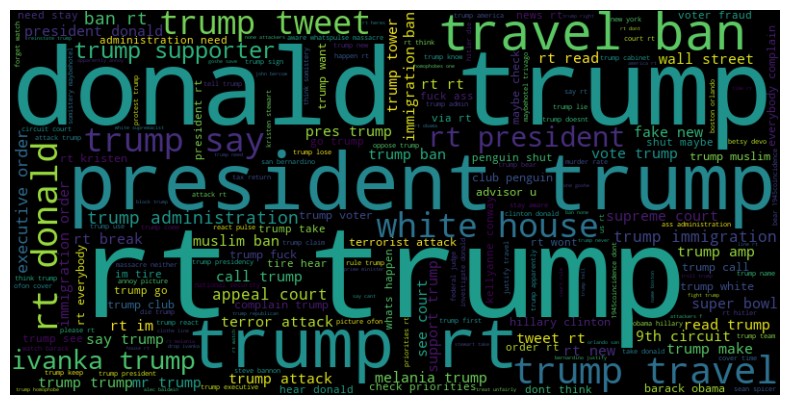

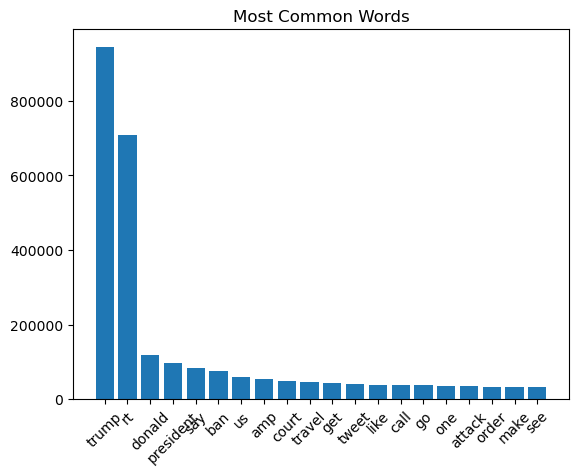

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

all_words = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

plt.bar(*zip(*common_words))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

### Tokenization & Padding

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

X = data['cleaned_text'].values
y = data['Sentiment'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Percentile-based padding
lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


### Model Building

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense

def build_model(model_type='rnn'):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
    if model_type == 'rnn':
        model.add(SimpleRNN(64))
    elif model_type == 'lstm':
        model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    return model


### Training & Evaluation

Epoch 1/10


C:\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20972/20972 ━━━━━━━━━━━━━━━━━━━━ 4511s 215ms/step - accuracy: 0.9069 - loss: 0.2274 - val_accuracy: 0.9530 - val_loss: 0.1290
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 4565s 217ms/step - accuracy: 0.9676 - loss: 0.0930 - val_accuracy: 0.9528 - val_loss: 0.1300
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 4371s 208ms/step - accuracy: 0.9761 - loss: 0.0708 - val_accuracy: 0.9576 - val_loss: 0.1245
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 5033s 240ms/step - accuracy: 0.9802 - loss: 0.0602 - val_accuracy: 0.9589 - val_loss: 0.1296
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 4378s 209ms/step - accuracy: 0.9817 - loss: 0.0560 - val_accuracy: 0.9573 - val_loss: 0.1360
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
Accuracy for Simple RNN: 0.9565219464511361

Classification Report for Simple RNN:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97    142641
           1       0.93      0.93      0.93     67074

    accuracy                      

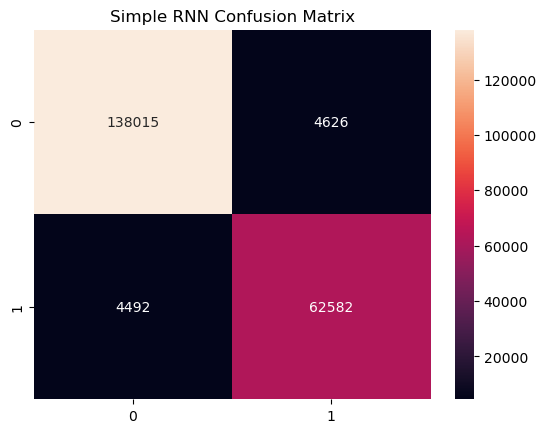

C:\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 4147s 198ms/step - accuracy: 0.9163 - loss: 0.2067 - val_accuracy: 0.9605 - val_loss: 0.1065
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 2163s 103ms/step - accuracy: 0.9755 - loss: 0.0679 - val_accuracy: 0.9628 - val_loss: 0.0992
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 2132s 102ms/step - accuracy: 0.9862 - loss: 0.0410 - val_accuracy: 0.9592 - val_loss: 0.1122
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 2135s 102ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9572 - val_loss: 0.1224
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
Accuracy for LSTM: 0.9565362515795246

Classification Report for LSTM:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97    142641
           1       0.93      0.94      0.93     67074

    accuracy                           0.96    209715
   macro avg       0.95      0.95      0.95    209715
weighted avg       0.96      0.96      0.96    209715



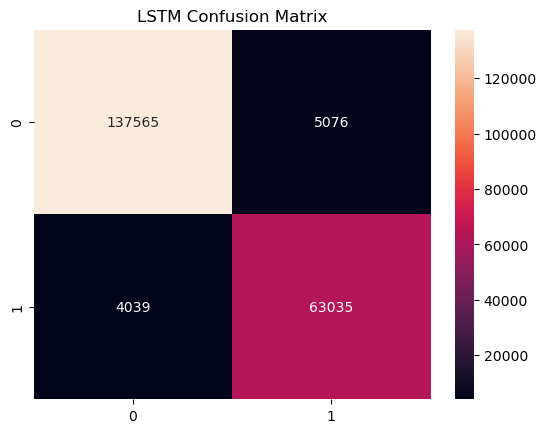

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def train_and_evaluate(model, name):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32,
                        callbacks=[EarlyStopping(patience=2)], verbose=1)

    preds = (model.predict(X_test_pad) > 0.5).astype("int32")
    print(f"Accuracy for {name}: {accuracy_score(y_test, preds)}")
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    return history

rnn_model = build_model('rnn')
rnn_history = train_and_evaluate(rnn_model, 'Simple RNN')

lstm_model = build_model('lstm')
lstm_history = train_and_evaluate(lstm_model, 'LSTM')


### Visualization

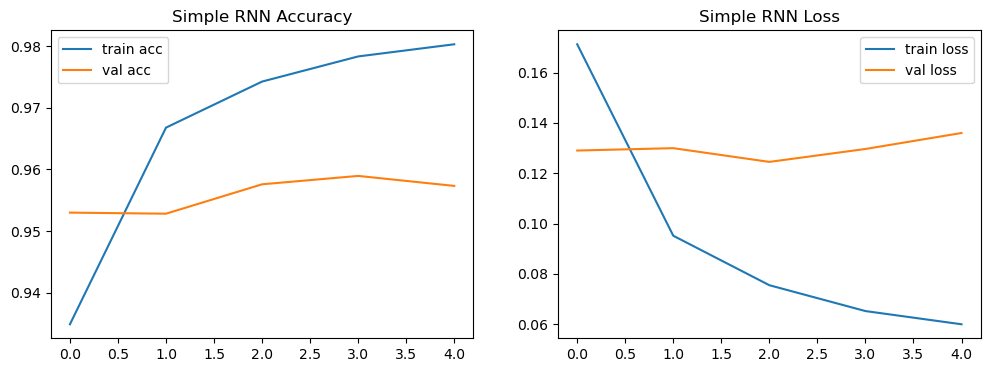

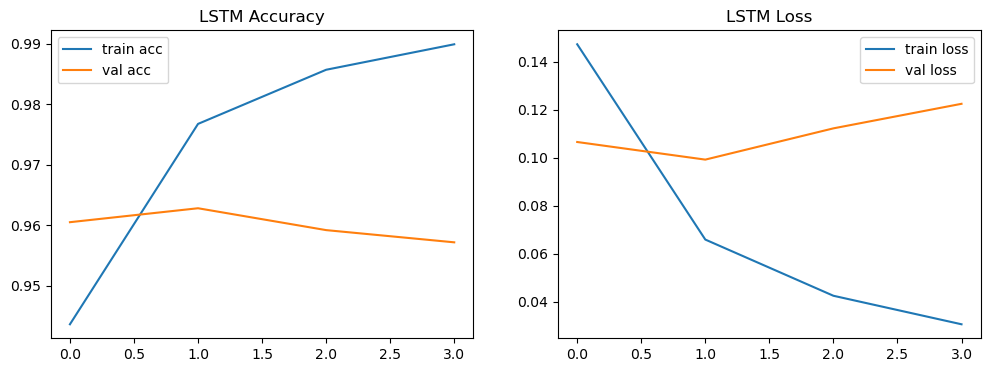

In [38]:
def plot_history(hist, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='train acc')
    plt.plot(hist.history['val_accuracy'], label='val acc')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='train loss')
    plt.plot(hist.history['val_loss'], label='val loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(rnn_history, 'Simple RNN')
plot_history(lstm_history, 'LSTM')


### GUI for Real-Time Prediction

In [42]:
!pip install gradio

In [62]:
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text):
    try:
        cleaned = text_cleaning_pipeline(text)
        seq = tokenizer.texts_to_sequences([cleaned])
        pad = pad_sequences(seq, maxlen=max_len, padding='post')
        pred = lstm_model.predict(pad)[0][0]

        if pred > 0.5:
            return "<div style='color:green; font-size: 20px;'>😊 Positive</div>"
        else:
            return "<div style='color:red; font-size: 20px;'>😠 Negative</div>"

    except Exception as e:
        return f"<div style='color:gray;'>Error: {str(e)}</div>"

gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter a text", label="Tweet Input"),
    outputs=gr.HTML(label="Sentiment Prediction"),
    title="Tweet Sentiment Analyzer",
    description="Enter a tweet to see if it's positive or negative.",
    css=custom_css
).launch()


* Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
